In [136]:
import tensorflow as tf

In [137]:
model = tf.keras.models.load_model('../trained_models/model1/m06c_test1')

In [138]:
input_technique_data_sources =         tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_data_sources')
input_technique_detection_name =       tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_detection_name')
input_technique_mitigation_id =        tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_mitigation_id')
input_technique_platforms =            tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_platforms')
input_technique_software_id =          tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_software_id')
input_technique_tactics =              tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_tactics')
input_technique_interaction_rate =     tf.keras.Input(shape=(1,), dtype=tf.float32, name='input_technique_interaction_rate')
input_technique_description =          tf.keras.Input(shape=(768,), dtype=tf.float32, name='input_technique_description')

vectorize_software_id =              model.vectorize_software_id
vectorize_tactics =              model.vectorize_tactics
vectorize_technique_data_sources =         model.vectorize_technique_data_sources
vectorize_technique_detection_name =       model.vectorize_technique_detection_name
vectorize_technique_mitigation_id =        model.vectorize_technique_mitigation_id
vectorize_technique_platforms =            model.vectorize_technique_platforms

embed_software_id =              model.embed_software_id
embed_tactics =                model.embed_tactics
embed_technique_data_sources =         model.embed_technique_data_sources
embed_technique_detection_name =       model.embed_technique_detection_name
embed_technique_mitigation_id =        model.embed_technique_mitigation_id
embed_technique_platforms =            model.embed_technique_platforms

concatenate = tf.keras.layers.Concatenate (axis=1)

technique_nn = model.Technique_NN

In [139]:
sub_model_data_sources = tf.keras.models.Sequential(
    [
        input_technique_data_sources,
        vectorize_technique_data_sources,
        embed_technique_data_sources
    ]
)
sub_model_detection_name = tf.keras.models.Sequential(
    [
        input_technique_detection_name,
        vectorize_technique_detection_name,
        embed_technique_detection_name
    ]
)
sub_model_mitigation_id = tf.keras.models.Sequential(
    [
        input_technique_mitigation_id,
        vectorize_technique_mitigation_id,
        embed_technique_mitigation_id
    ]
)
sub_model_platforms = tf.keras.models.Sequential(
    [
        input_technique_platforms,
        vectorize_technique_platforms,
        embed_technique_platforms
    ]
)
sub_model_software_id = tf.keras.models.Sequential(
    [
        input_technique_software_id,
        vectorize_software_id,
        embed_software_id
    ]
)
sub_model_tactics = tf.keras.models.Sequential(
    [
        input_technique_tactics,
        vectorize_tactics,
        embed_tactics
    ]
)

technique_data_sources = tf.reduce_mean (sub_model_data_sources.output, axis = 1)
technique_detection_name = tf.reduce_mean (sub_model_detection_name.output, axis = 1)
technique_mitigation_id = tf.reduce_mean (sub_model_mitigation_id.output, axis = 1)
technique_platforms = tf.reduce_mean (sub_model_platforms.output, axis = 1)
technique_software_id = tf.reduce_mean (sub_model_software_id.output, axis = 1)
technique_tactics = tf.reduce_mean (sub_model_tactics.output, axis = 1)

technique_concat = tf.keras.layers.Concatenate(axis=-1)

concatenated_features = technique_concat (
    [
    input_technique_interaction_rate,
    input_technique_description,
    technique_data_sources,
    technique_detection_name,
    technique_mitigation_id,
    technique_platforms,
    technique_software_id,
    technique_tactics, 
    ]
)
sub_model_technique_nn = model.Technique_NN
norm_output_Technique = tf.linalg.l2_normalize (concatenated_features, axis = 1)
learned_feature = sub_model_technique_nn(norm_output_Technique)

sub_model = tf.keras.models.Model (
    inputs = {
        'input_technique_interaction_rate' : input_technique_interaction_rate,
        'input_technique_description' : input_technique_description,
        'input_technique_data_sources' : input_technique_data_sources,
        'input_technique_detection_name' : input_technique_detection_name,
        'input_technique_mitigation_id' : input_technique_mitigation_id,
        'input_technique_platforms' : input_technique_platforms,
        'input_technique_software_id' : input_technique_software_id,
        'input_technique_tactics' : input_technique_tactics,
    },
    outputs = learned_feature
)

In [140]:
sub_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_technique_data_sources (  [(None, None)]      0           []                               
 InputLayer)                                                                                      
                                                                                                  
 input_technique_detection_name  [(None, None)]      0           []                               
  (InputLayer)                                                                                    
                                                                                                  
 input_technique_mitigation_id   [(None, None)]      0           []                               
 (InputLayer)                                                                               

In [141]:
from tensorflow.keras.utils import plot_model

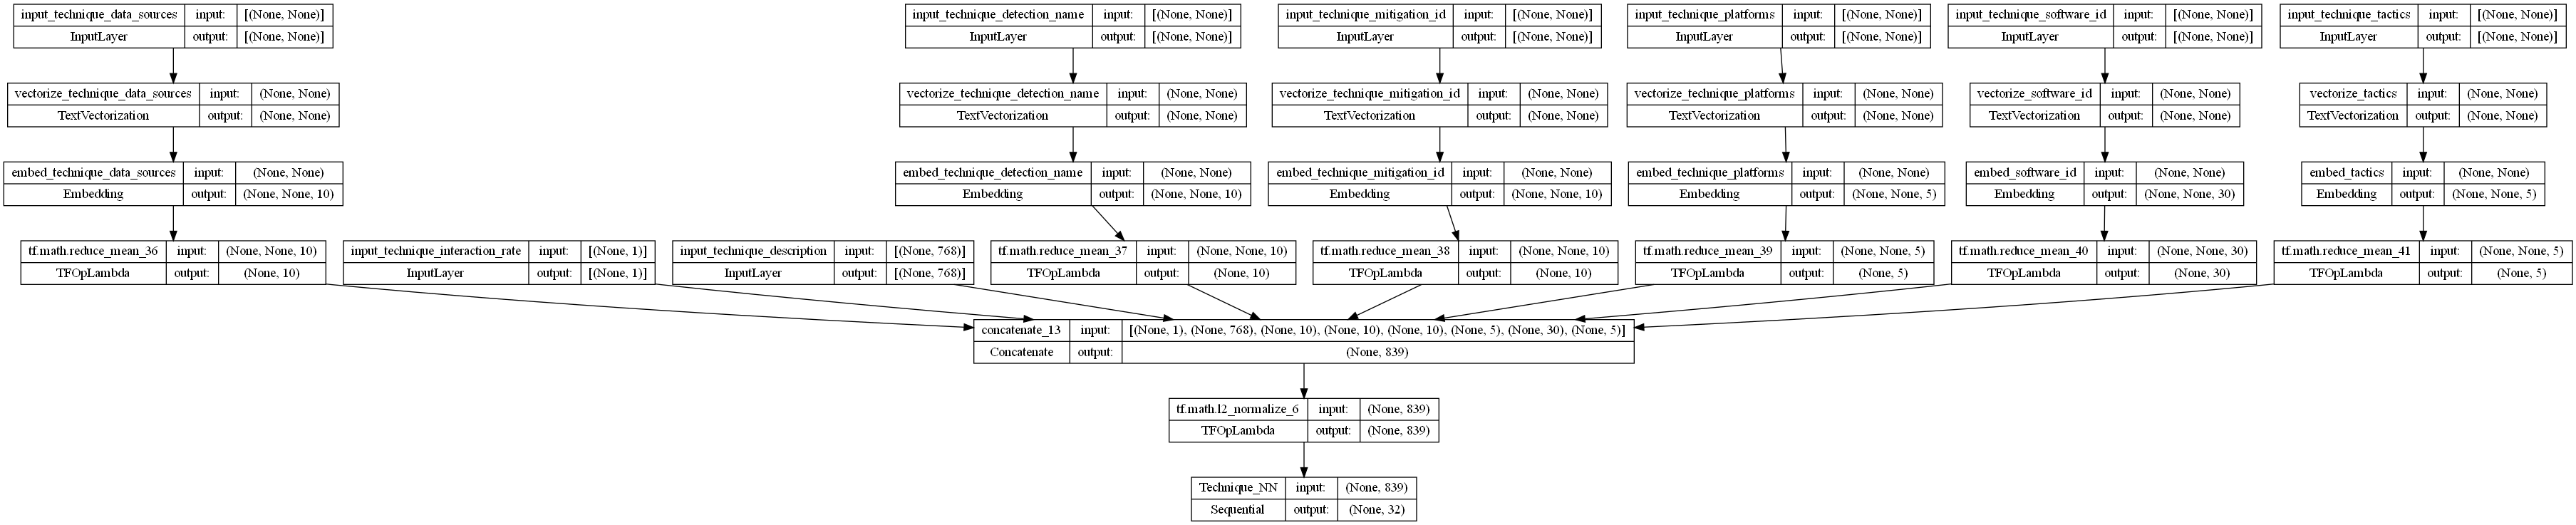

In [142]:
plot_model(sub_model, to_file='sequential_model.png', show_shapes=True)

In [143]:
import sys
sys.path.append ('..')
from src.models.model1.model_preprocess import build_technique_dataset
import pandas as pd
technique_features_df = pd.read_pickle ('../data/processed/model1/processed_technnique_features.pkl')
input_technique = build_technique_dataset (technique_features_df)

In [144]:
input_technique = input_technique.batch(32)
learned_features = sub_model.predict (input_technique)

19/19 [==============================] - 0s 5ms/step


In [145]:
learned_features

array([[-0.08308219,  0.10183524, -0.07867591, ..., -0.06149907,
         0.03326717, -0.1555772 ],
       [-0.07167055,  0.12368597, -0.0929604 , ..., -0.06694608,
         0.00253738, -0.19590639],
       [-0.10067119,  0.12289061, -0.07823908, ..., -0.07202293,
         0.03345393, -0.19925109],
       ...,
       [-0.09101062,  0.10674597, -0.0851207 , ..., -0.06868359,
         0.01000133, -0.2206149 ],
       [-0.05808045,  0.11329648, -0.08410615, ..., -0.07068264,
         0.0209235 , -0.19520216],
       [-0.07920597,  0.13365167, -0.07492   , ..., -0.06496008,
         0.0209578 , -0.19838603]], dtype=float32)

---

In [146]:
learned_features.shape

(607, 32)

# Similarity Matrix

In [147]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity (learned_features)
similarity_matrix.shape

(607, 607)

<Figure size 576x432 with 0 Axes>

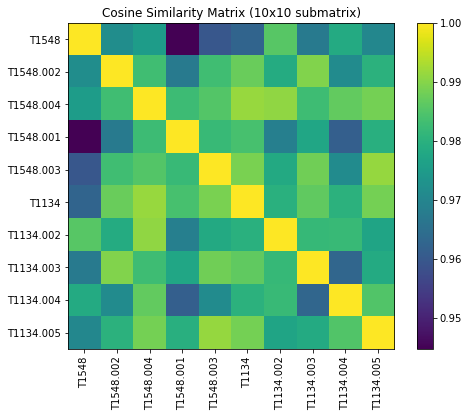

In [158]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
n = 10
id_list = list (technique_features_df['technique_ID'])
submatrix = similarity_matrix[:n, :n]
sub_id_list = id_list[:n]  # IDs corresponding to the submatrix

# Visualize the submatrix as a heatmap with row and column IDs displayed
plt.figure(figsize=(8, 6))
plt.imshow(submatrix, cmap='viridis', interpolation='nearest')
plt.title(f'Cosine Similarity Matrix ({n}x{n} submatrix)')
plt.colorbar()
plt.xticks(ticks=np.arange(n), labels=sub_id_list, rotation=90)  # Set x-axis ticks as IDs
plt.yticks(ticks=np.arange(n), labels=sub_id_list)  # Set y-axis ticks as IDs
# plt.xlabel('Samples')
# plt.ylabel('Samples')
plt.show()

In [159]:
submatrix 

array([[1.        , 0.9718032 , 0.97530484, 0.94475454, 0.9597417 ,
        0.96245795, 0.9855495 , 0.9674727 , 0.97861075, 0.97032106],
       [0.9718032 , 0.99999994, 0.9830258 , 0.9675585 , 0.9831604 ,
        0.98734164, 0.9788207 , 0.98954046, 0.97147024, 0.98020685],
       [0.97530484, 0.9830258 , 1.        , 0.98269975, 0.98524374,
        0.991481  , 0.99085295, 0.9829432 , 0.9866655 , 0.9884524 ],
       [0.94475454, 0.9675585 , 0.98269975, 0.99999994, 0.98192656,
        0.9838943 , 0.96858263, 0.97753793, 0.96151674, 0.97961164],
       [0.9597417 , 0.9831604 , 0.98524374, 0.98192656, 0.99999994,
        0.98897916, 0.978412  , 0.9880505 , 0.97140867, 0.9912129 ],
       [0.96245795, 0.98734164, 0.991481  , 0.9838943 , 0.98897916,
        1.        , 0.97987324, 0.9866045 , 0.98025256, 0.9885157 ],
       [0.9855495 , 0.9788207 , 0.99085295, 0.96858263, 0.978412  ,
        0.97987324, 1.        , 0.9817224 , 0.9818753 , 0.9771205 ],
       [0.9674727 , 0.98954046, 0.9829432

In [160]:
technique_features_df.iloc[0:4]

,technique_ID,input_technique_data_sources,input_technique_detection_name,input_technique_mitigation_id,input_technique_platforms,input_technique_software_id,input_technique_tactics,input_technique_description,input_technique_interaction_rate
0,T1548,"[command_command_execution, file_file_metadata...","[command_execution, file_metadata, file_modifi...","[m1047, m1038, m1028, m1026, m1022, other]","[linux, windows, macos]",[],"[defense_evasion, privilege_escalation]","[-0.36630338, -0.24036503, -0.36260876, 0.0984...",-0.516771
1,T1548.002,"[command_command_execution, process_process_cr...","[command_execution, process_creation, windows_...","[m1047, m1026, other]",[windows],"[s0584, s0640, s0606, s0570, s1068, s0089, s10...","[defense_evasion, privilege_escalation]","[-0.5305501, -0.43114784, -0.67361057, 0.16222...",0.420987
2,T1548.004,"[process_os_api_execution, process_process_cre...","[os_api_execution, process_creation]",[m1038],[macos],[s0402],"[defense_evasion, privilege_escalation]","[-0.57463825, -0.65824693, -0.23797776, -0.254...",-0.516771
3,T1548.001,"[command_command_execution, file_file_metadata...","[command_execution, file_metadata, file_modifi...",[m1028],"[linux, macos]",[other],"[defense_evasion, privilege_escalation]","[-0.7420097, -0.461457, -0.45979652, -0.116038...",-0.516771


- sorting index by largest value, stored in 2d list

In [161]:
import numpy as np

# Let's say your 2D array is named 'array' with shape (m, n)
# For demonstration, let's create a sample 2D array
array = similarity_matrix

# Get the shape of the array
m, n = array.shape

# Create an empty list to store the sorted indices for each vector
sorted_indices_desc_list = []

# Loop through each row (1D vector) in the 2D array
for i in range(m):
    # sorted_indices_desc = np.argsort(array[i])[::-1]
    sorted_indices_desc = np.argsort(array[i])[::-1]
    sorted_indices_desc_list.append(sorted_indices_desc)



In [162]:
submatrix

array([[1.        , 0.9718032 , 0.97530484, 0.94475454, 0.9597417 ,
        0.96245795, 0.9855495 , 0.9674727 , 0.97861075, 0.97032106],
       [0.9718032 , 0.99999994, 0.9830258 , 0.9675585 , 0.9831604 ,
        0.98734164, 0.9788207 , 0.98954046, 0.97147024, 0.98020685],
       [0.97530484, 0.9830258 , 1.        , 0.98269975, 0.98524374,
        0.991481  , 0.99085295, 0.9829432 , 0.9866655 , 0.9884524 ],
       [0.94475454, 0.9675585 , 0.98269975, 0.99999994, 0.98192656,
        0.9838943 , 0.96858263, 0.97753793, 0.96151674, 0.97961164],
       [0.9597417 , 0.9831604 , 0.98524374, 0.98192656, 0.99999994,
        0.98897916, 0.978412  , 0.9880505 , 0.97140867, 0.9912129 ],
       [0.96245795, 0.98734164, 0.991481  , 0.9838943 , 0.98897916,
        1.        , 0.97987324, 0.9866045 , 0.98025256, 0.9885157 ],
       [0.9855495 , 0.9788207 , 0.99085295, 0.96858263, 0.978412  ,
        0.97987324, 1.        , 0.9817224 , 0.9818753 , 0.9771205 ],
       [0.9674727 , 0.98954046, 0.9829432

In [163]:
sorted_indices_desc_list

[array([  0, 593,  92,  52, 563, 424,  36, 594, 504, 220, 597, 479, 454,
         53,  32,  25, 461, 503, 171, 193, 468, 555, 450, 324, 119, 546,
        104,   6, 490, 457, 160, 109, 423, 146, 148, 417, 259, 108, 562,
        499,  80, 531, 488,  11, 310, 470, 491, 513, 371, 232, 115, 107,
        404, 393, 510,  56, 185, 509, 251, 333, 248, 458,  42, 296, 249,
        568, 482, 118, 398, 128,  33, 420, 584, 110, 201, 595, 235, 271,
        484,  12, 200, 373, 571, 596, 328, 602, 307,  26, 447, 105, 569,
         37, 446, 238, 167, 449, 114, 340,  86, 253, 429, 165, 426, 181,
        368, 451, 269, 519, 492, 419, 265, 254, 578, 455, 239, 486, 421,
        588, 272, 554, 112, 561, 153, 182, 260, 240, 471, 581, 227, 603,
        103,  29,  48, 258, 137, 529, 515, 280, 111, 267,  44, 456, 547,
        268, 590, 288, 478, 236,  20,  31, 592, 557, 261, 126,  89, 524,
        500, 106, 237, 428, 202, 139, 508, 270, 159, 357, 302, 252, 473,
        358, 305, 278, 362, 559, 250, 113, 462, 177

In [164]:
look_up_table = pd.DataFrame (
    {
        'technique_ID' : id_list,
        'sorted_indices' : sorted_indices_desc_list
    }
)

In [165]:
look_up_table

,technique_ID,sorted_indices
0,T1548,"[0, 593, 92, 52, 563, 424, 36, 594, 504, 220, ..."
1,T1548.002,"[1, 512, 10, 344, 346, 524, 522, 181, 370, 516..."
2,T1548.004,"[2, 327, 336, 297, 389, 57, 249, 326, 305, 203..."
3,T1548.001,"[3, 501, 532, 55, 99, 212, 216, 406, 298, 208,..."
4,T1548.003,"[4, 523, 301, 536, 9, 437, 76, 352, 306, 325, ..."
...,...,...
602,T1102.002,"[602, 604, 251, 118, 44, 368, 603, 601, 451, 4..."
603,T1102.001,"[603, 318, 44, 87, 604, 254, 43, 602, 133, 583..."
604,T1102.003,"[604, 602, 87, 251, 603, 44, 601, 368, 451, 44..."
605,T1047,"[605, 284, 152, 87, 318, 153, 463, 603, 122, 4..."


In [166]:
def technique_index_id_map(lst):
    return [id_list[i] for i in lst]
look_up_table['sorted_similar_techniques'] = look_up_table['sorted_indices'].apply (technique_index_id_map)

In [167]:
look_up_table

,technique_ID,sorted_indices,sorted_similar_techniques
0,T1548,"[0, 593, 92, 52, 563, 424, 36, 594, 504, 220, ...","[T1548, T1125, T1059, T1119, T1205.001, T1566...."
1,T1548.002,"[1, 512, 10, 344, 346, 524, 522, 181, 370, 516...","[T1548.002, T1528, T1134.001, T1556, T1556.007..."
2,T1548.004,"[2, 327, 336, 297, 389, 57, 249, 326, 305, 203...","[T1548.004, T1056.001, T1036.007, T1574.010, T..."
3,T1548.001,"[3, 501, 532, 55, 99, 212, 216, 406, 298, 208,...","[T1548.001, T1129, T1218.003, T1197, T1059.004..."
4,T1548.003,"[4, 523, 301, 536, 9, 437, 76, 352, 306, 325, ...","[T1548.003, T1553.001, T1562.002, T1218.014, T..."
...,...,...,...
602,T1102.002,"[602, 604, 251, 118, 44, 368, 603, 601, 451, 4...","[T1102.002, T1102.003, T1606.001, T1136, T1071..."
603,T1102.001,"[603, 318, 44, 87, 604, 254, 43, 602, 133, 583...","[T1102.001, T1070.004, T1071.003, T1651, T1102..."
604,T1102.003,"[604, 602, 87, 251, 603, 44, 601, 368, 451, 44...","[T1102.003, T1102.002, T1651, T1606.001, T1102..."
605,T1047,"[605, 284, 152, 87, 318, 153, 463, 603, 122, 4...","[T1047, T1564.006, T1602.002, T1651, T1070.004..."
